In [1]:
import tensorflow
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist


C:\Users\PRAVEEN\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PRAVEEN\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PRAVEEN\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PRAVEEN\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [2]:
(xtrain,xtrainlabel),(xtest,xtestlabel)=mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
from tensorflow.keras import backend as K
if K.image_data_format=="channels_first":
    xtrain=xtrain.reshape(xtrain.shape[0],1,28,28)
    xtest=xtest.reshape(xtest.shape[0],1,28,28)
    input_shape=(1,28,28)
else:
    xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
    xtest=xtest.reshape(xtest.shape[0],28,28,1)
    input_shape=(28,28,1)
    


In [5]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain /=255
xtest /=255

In [6]:
xtrainlabelnew = tensorflow.keras.utils.to_categorical(xtrainlabel, 10)
xtestlabelnew = tensorflow.keras.utils.to_categorical(xtestlabel, 10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


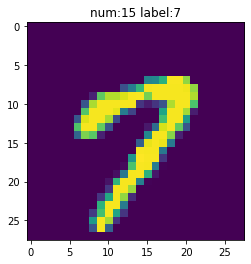

In [7]:
import matplotlib.pyplot as plt
def image_dis(n):
    print(xtrainlabelnew[n])
    lab=xtrainlabelnew[n].argmax(axis=0)
    img=xtrain[n].reshape([28,28])
    plt.title("num:%d label:%d"%(n,lab))
    plt.imshow(img)
    
image_dis(15)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history = model.fit(xtrain, xtrainlabelnew,
                    batch_size=32,
                    epochs=15,
                    validation_data=(xtest, xtestlabelnew))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 150s 2ms/sample - loss: 0.1383 - accuracy: 0.9593 - val_loss: 0.0460 - val_accuracy: 0.9848
Epoch 2/15
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.0734 - accuracy: 0.9772 - val_loss: 0.0302 - val_accuracy: 0.9897
Epoch 3/15
60000/60000 [==============================] - 142s 2ms/sample - loss: 0.0560 - accuracy: 0.9833 - val_loss: 0.0292 - val_accuracy: 0.9909
Epoch 4/15
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.0481 - accuracy: 0.9858 - val_loss: 0.0299 - val_accuracy: 0.9897
Epoch 5/15
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0275 - val_accuracy: 0.9912
Epoch 6/15
60000/60000 [==============================] - 143s 2ms/sample - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0269 - val_accuracy: 0.9920
Epoch 7/15
60000/60000 [==========================

In [12]:
loss,accu=model.evaluate(xtest,xtestlabelnew,verbose=0)
print("loss:",loss)
print("accuracy",accu)

loss: 0.03539076957559437
accuracy 0.9927


In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
target=["0","1","2","3","4","5","6","7","8","9"]
pre=np.round(model.predict(xtest),0)
classif=metrics.classification_report(xtestlabelnew,pre,target_names=target)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       1.00      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



C:\Users\PRAVEEN\ana\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print(classif)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       1.00      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



In [25]:
model.save_weights("mnistweigts.h5py")